In [82]:
import pandas as pd
import numpy as np

In [73]:
data = pd.read_csv('MSDhoni_ODI_Stats.csv')

In [74]:
data.head()

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
0,0,1,1,0,0,0.00,7,run out,1,v Bangladesh,Chattogram,23 Dec 2004
1,12,16,11,2,0,109.09,7,caught,2,v Bangladesh,Dhaka,26 Dec 2004
2,7*,2,2,0,1,350.00,7,not out,1,v Bangladesh,Dhaka,27 Dec 2004
3,3,8,7,0,0,42.85,7,caught,1,v Pakistan,Kochi,2 Apr 2005
4,148,155,123,15,4,120.32,3,caught,1,v Pakistan,Visakhapatnam,5 Apr 2005


In [75]:
data.tail()

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
345,56*,99,61,3,2,91.80,6,not out,1,v West Indies,Manchester,27 Jun 2019
346,42*,54,31,4,1,135.48,6,not out,2,v England,Birmingham,30 Jun 2019
347,35,52,33,4,0,106.06,6,caught,1,v Bangladesh,Birmingham,2 Jul 2019
348,DNB,-,-,-,-,-,-,-,2,v Sri Lanka,Leeds,6 Jul 2019
349,50,114,72,1,1,69.44,7,run out,2,v New Zealand,Manchester,9 Jul 2019


In [76]:
data.dtypes

Runs          object
Mins          object
BF            object
4s            object
6s            object
SR            object
Pos           object
Dismissal     object
Inns          object
Opposition    object
Ground        object
Start Date    object
dtype: object

In [83]:
# Replace '-' with NaN in all columns
data = data.replace('-', np.nan)

# Drop rows with missing values
data = data.dropna()

In [77]:
# Calculate total runs scored
data['Runs'] = data['Runs'].str.replace('*', '')  # Remove asterisk from 'Runs' column
data['Runs'] = pd.to_numeric(data['Runs'], errors='coerce')  # Convert 'Runs' to numeric values
total_runs = data['Runs'].sum()
print(f"Total runs scored: {total_runs}")

Total runs scored: 10773.0


C:\Users\sreej\AppData\Local\Temp\ipykernel_1816\2722962091.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Runs'] = data['Runs'].str.replace('*', '')  # Remove asterisk from 'Runs' column


In [78]:
# Calculate batting average
innings_batted = data['Runs'].notna().sum()
batting_average = total_runs / innings_batted
print(f"Batting average: {batting_average:.2f}")

Batting average: 36.27


In [79]:
data.columns

Index(['Runs', 'Mins', 'BF', '4s', '6s', 'SR', 'Pos', 'Dismissal', 'Inns',
       'Opposition', 'Ground', 'Start Date'],
      dtype='object')

In [84]:
# Convert 'BF' column to integer type
data['BF'] = data['BF'].astype(int)

# Calculate strike rate
total_balls_faced = data['BF'].sum()
print(f"Total balls faced: {total_balls_faced}")
strike_rate = (total_runs / total_balls_faced) * 100
print(f"Strike rate: {strike_rate:.2f}")

Total balls faced: 11188
Strike rate: 96.29


In [85]:
# Find the highest score
highest_score = data['Runs'].max()
print(f"Highest score: {highest_score}")

Highest score: 183.0


In [86]:
highscore = data['Runs'].to_list()
print(max(highscore))

hs=0
for i in range(len(highscore)):
    if highscore[i] < hs:
        pass
    else:
        hs = highscore[i]
        
print(hs)

183.0
183.0


In [87]:
# Count the number of centuries and half-centuries
centuries = (data['Runs'] >= 100).sum()
half_centuries = ((data['Runs'] >= 50) & (data['Runs'] < 100)).sum()
print(f"Number of centuries: {centuries}")
print(f"Number of half-centuries: {half_centuries}")

Number of centuries: 10
Number of half-centuries: 67


In [88]:
#Analyze the distribution of runs scored
runs_distribution = data['Runs'].describe()
print("Distribution of runs scored:")
print(runs_distribution)

Distribution of runs scored:
count    268.000000
mean      36.902985
std       30.434400
min        0.000000
25%       13.750000
50%       31.000000
75%       51.000000
max      183.000000
Name: Runs, dtype: float64


In [89]:
# Analyze performance across different batting positions
batting_position_stats = data.groupby('Pos')['Runs'].agg(['sum', 'mean', 'max'])
print("Performance across batting positions:")
print(batting_position_stats)

Performance across batting positions:
        sum       mean    max
Pos                          
2      98.0  49.000000   96.0
3     979.0  65.266667  183.0
4    1204.0  46.307692  109.0
5    2837.0  39.402778  134.0
6    3830.0  32.457627  139.0
7     891.0  27.843750  139.0
8      51.0  17.000000   20.0


In [90]:
# Analyze performance against different oppositions
opposition_stats = data.groupby('Opposition')['Runs'].agg(['sum', 'mean', 'max'])
print("\nPerformance against different oppositions:")
print(opposition_stats)


Performance against different oppositions:
                   sum        mean    max
Opposition                               
v Afghanistan     28.0   28.000000   28.0
v Africa XI      174.0   58.000000  139.0
v Australia     1488.0   33.818182  139.0
v Bangladesh     500.0   33.333333  101.0
v Bermuda         29.0   29.000000   29.0
v England       1494.0   35.571429  134.0
v Hong Kong      109.0  109.000000  109.0
v Ireland         34.0   34.000000   34.0
v Netherlands     19.0   19.000000   19.0
v New Zealand    880.0   36.666667   84.0
v Pakistan      1231.0   39.709677  148.0
v South Africa   795.0   26.500000   92.0
v Sri Lanka     2211.0   46.062500  183.0
v West Indies    746.0   31.083333   95.0
v Zimbabwe       152.0   76.000000   85.0


In [91]:
# Analyze performance in different innings
innings_stats = data.groupby('Inns')['Runs'].agg(['sum', 'mean', 'max'])
print("\nPerformance in different innings:")
print(innings_stats)


Performance in different innings:
         sum       mean    max
Inns                          
1     5576.0  40.115108  148.0
2     4314.0  33.441860  183.0


In [92]:
# Evaluate performance in wins vs. losses
match_result = data['Runs'].notna()  # Assuming missing 'Runs' indicates a loss
wins_stats = data[match_result]['Runs'].agg(['sum', 'mean', 'max'])
losses_stats = data[~match_result]['Runs'].agg(['sum', 'mean', 'max'])
print("\nPerformance in wins:")
print(wins_stats)
print("\nPerformance in losses:")
print(losses_stats)


Performance in wins:
sum     9890.000000
mean      36.902985
max      183.000000
Name: Runs, dtype: float64

Performance in losses:
sum     0.0
mean    NaN
max     NaN
Name: Runs, dtype: float64


In [93]:
import matplotlib.pyplot as plt

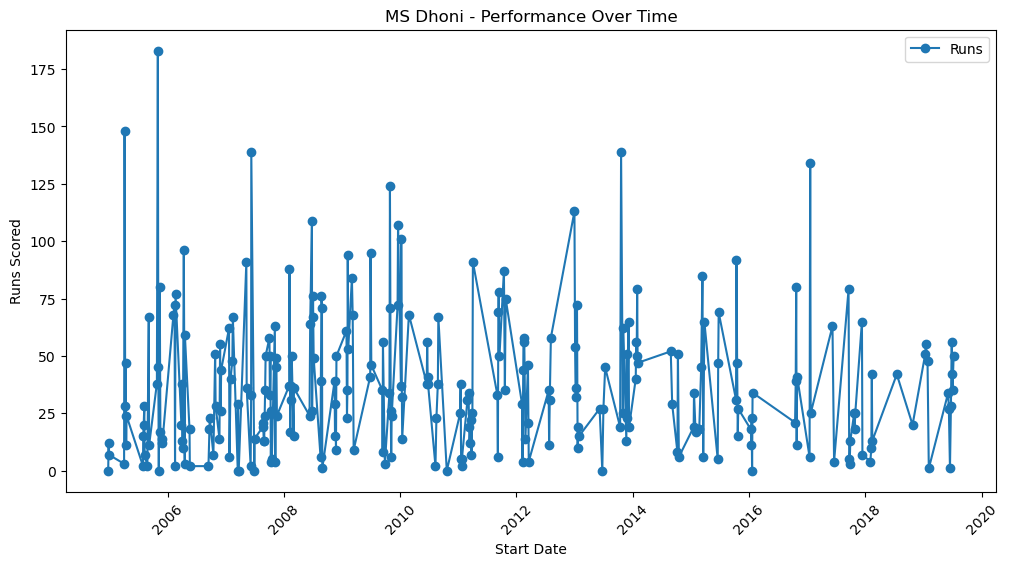

In [94]:
# Visualize performance over time
data['Start Date'] = pd.to_datetime(data['Start Date'])
data.set_index('Start Date', inplace=True)

plt.figure(figsize=(12, 6))
plt.plot(data['Runs'], marker='o', linestyle='-', label='Runs')
plt.xlabel('Start Date')
plt.ylabel('Runs Scored')
plt.title('MS Dhoni - Performance Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [95]:
# Analyze year-wise performance
data['Year'] = data.index.year
year_wise_stats = data.groupby('Year')['Runs'].agg(['sum', 'mean', 'max'])
print("Year-wise performance:")
print(year_wise_stats)

Year-wise performance:
         sum       mean    max
Year                          
2004    19.0   6.333333   12.0
2005   802.0  36.454545  183.0
2006   746.0  32.434783   96.0
2007  1103.0  33.424242  139.0
2008  1097.0  42.192308  109.0
2009  1175.0  51.086957  124.0
2010   555.0  39.642857  101.0
2011   749.0  35.666667   91.0
2012   524.0  37.428571  113.0
2013   753.0  37.650000  139.0
2014   418.0  41.800000   79.0
2015   640.0  37.647059   92.0
2016   278.0  27.800000   80.0
2017   472.0  33.714286  134.0
2018   131.0  21.833333   42.0
2019   428.0  35.666667   56.0


In [96]:
# Identify milestone performances
centuries = data[data['Runs'] >= 100]
print("Centuries:")
print(centuries[['Runs', 'Opposition', 'Ground', 'Year']])

half_centuries = data[(data['Runs'] >= 50) & (data['Runs'] < 100)]
print("\nHalf-centuries:")
print(half_centuries[['Runs', 'Opposition', 'Ground', 'Year']])

Centuries:
             Runs    Opposition         Ground  Year
Start Date                                          
2005-04-05  148.0    v Pakistan  Visakhapatnam  2005
2005-10-31  183.0   v Sri Lanka         Jaipur  2005
2007-06-10  139.0   v Africa XI        Chennai  2007
2008-06-25  109.0   v Hong Kong        Karachi  2008
2009-10-28  124.0   v Australia         Nagpur  2009
2009-12-18  107.0   v Sri Lanka         Nagpur  2009
2010-01-07  101.0  v Bangladesh         Mirpur  2010
2012-12-30  113.0    v Pakistan        Chennai  2012
2013-10-19  139.0   v Australia         Mohali  2013
2017-01-19  134.0     v England        Cuttack  2017

Half-centuries:
            Runs     Opposition      Ground  Year
Start Date                                       
2005-09-04  67.0     v Zimbabwe      Harare  2005
2005-11-12  80.0    v Sri Lanka    Vadodara  2005
2006-02-06  68.0     v Pakistan    Peshawar  2006
2006-02-13  72.0     v Pakistan      Lahore  2006
2006-02-19  77.0     v Pakistan     

In [97]:
print("Available columns:")
print(data.columns)

Available columns:
Index(['Runs', 'Mins', 'BF', '4s', '6s', 'SR', 'Pos', 'Dismissal', 'Inns',
       'Opposition', 'Ground', 'Year'],
      dtype='object')


In [98]:

# Analyze performance against specific teams
team_stats = data.groupby('Opposition')['Runs'].agg(['sum', 'mean', 'max'])
print("\nPerformance against Specific Teams:")
print(team_stats)


Performance against Specific Teams:
                   sum        mean    max
Opposition                               
v Afghanistan     28.0   28.000000   28.0
v Africa XI      174.0   58.000000  139.0
v Australia     1488.0   33.818182  139.0
v Bangladesh     500.0   33.333333  101.0
v Bermuda         29.0   29.000000   29.0
v England       1494.0   35.571429  134.0
v Hong Kong      109.0  109.000000  109.0
v Ireland         34.0   34.000000   34.0
v Netherlands     19.0   19.000000   19.0
v New Zealand    880.0   36.666667   84.0
v Pakistan      1231.0   39.709677  148.0
v South Africa   795.0   26.500000   92.0
v Sri Lanka     2211.0   46.062500  183.0
v West Indies    746.0   31.083333   95.0
v Zimbabwe       152.0   76.000000   85.0


In [99]:
# Analyze performance in high-pressure situations
chasing_stats = data[data['Inns'] == 2]
chasing_performance = chasing_stats.groupby('Inns')['Runs'].agg(['sum', 'mean', 'max'])
print("Performance while Chasing:")
print(chasing_performance)

Performance while Chasing:
Empty DataFrame
Columns: [sum, mean, max]
Index: []


In [100]:
# Analyze strike rate and scoring patterns in different phases of an innings
powerplay_stats = data[data['BF'] <= 60]
middle_overs_stats = data[(data['BF'] > 60) & (data['BF'] <= 120)]
death_overs_stats = data[data['BF'] > 120]

print("\nStrike Rate in Different Phases:")
print(f"Powerplay: {powerplay_stats['Runs'].sum() / powerplay_stats['BF'].sum() * 100:.2f}")
print(f"Middle Overs: {middle_overs_stats['Runs'].sum() / middle_overs_stats['BF'].sum() * 100:.2f}")
print(f"Death Overs: {death_overs_stats['Runs'].sum() / death_overs_stats['BF'].sum() * 100:.2f}")


Strike Rate in Different Phases:
Powerplay: 89.82
Middle Overs: 84.34
Death Overs: 106.01


In [101]:
import matplotlib.pyplot as plt

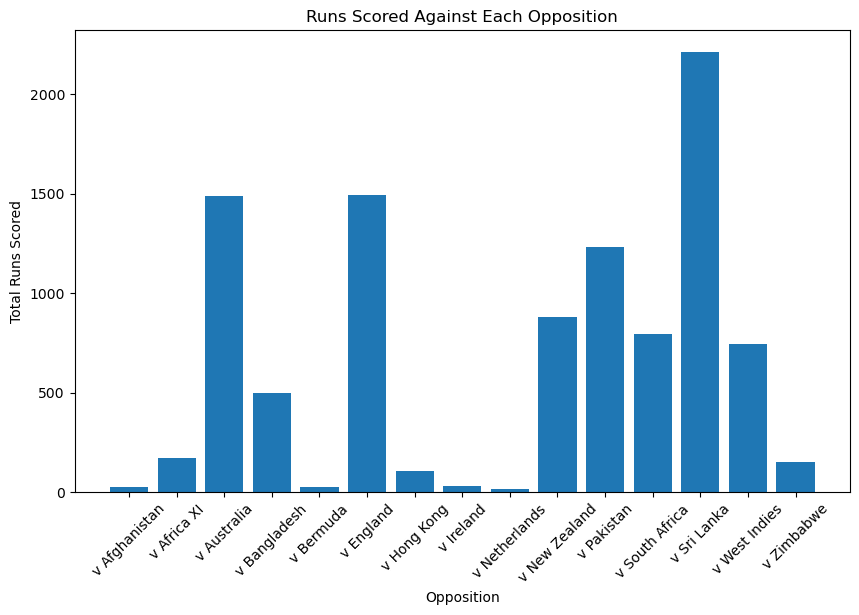

In [102]:
# Create a bar chart of runs scored against each opposition
opposition_runs = data.groupby('Opposition')['Runs'].sum()
plt.figure(figsize=(10, 6))
plt.bar(opposition_runs.index, opposition_runs.values)
plt.xlabel('Opposition')
plt.ylabel('Total Runs Scored')
plt.title('Runs Scored Against Each Opposition')
plt.xticks(rotation=45)
plt.show()

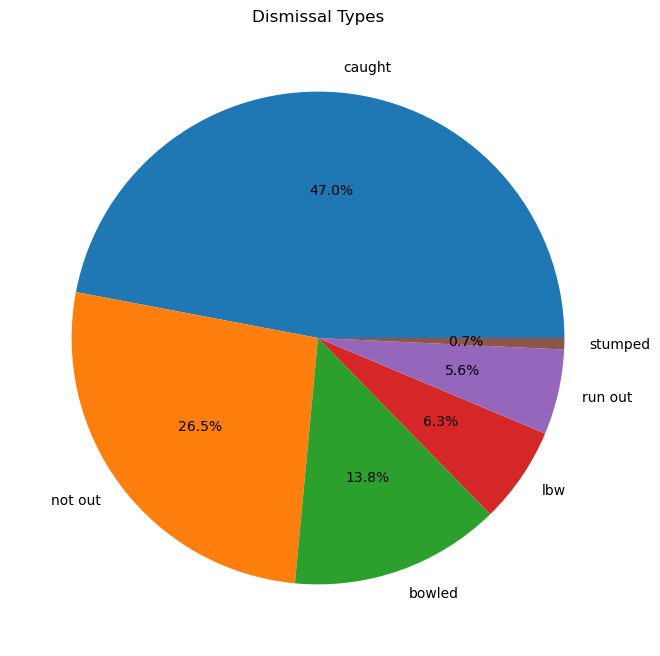

In [103]:
# Create a pie chart of dismissal types
dismissal_counts = data['Dismissal'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(dismissal_counts, labels=dismissal_counts.index, autopct='%1.1f%%')
plt.title('Dismissal Types')
plt.show()

In [104]:
from scipy import stats

In [105]:
# Perform hypothesis testing to compare performance in home vs. away matches
home_runs = data[data['Ground'].str.contains('India')]['Runs']
away_runs = data[~data['Ground'].str.contains('India')]['Runs']
t_stat, p_value = stats.ttest_ind(home_runs, away_runs)
print(f"T-Statistic: {t_stat:.2f}")
print(f"P-Value: {p_value:.4f}")

T-Statistic: nan
P-Value: nan


In [106]:
# Perform regression analysis to identify factors affecting performance
from sklearn.linear_model import LinearRegression

In [107]:
# Prepare the data for regression analysis
X = data[['Inns', 'Pos', 'Opposition']].apply(lambda x: pd.factorize(x)[0]).values.reshape(-1, 3)
y = data['Runs'].values.reshape(-1, 1)

In [108]:

# Fill NaN values with 0 in the feature matrix X
X = data[['Inns', 'Pos', 'Opposition']].apply(lambda x: pd.factorize(x)[0]).fillna(0).values.reshape(-1, 3)

In [109]:
# Fill NaN values with the mean of the 'Runs' column in the target vector y
y = data['Runs'].fillna(data['Runs'].mean()).values.reshape(-1, 1)

In [110]:
# Create and fit the regression model
reg_model = LinearRegression()
reg_model.fit(X, y)

LinearRegression()

In [111]:
# Print the regression coefficients and intercept
print(f"Regression Coefficients: {reg_model.coef_[0]}")
print(f"Intercept: {reg_model.intercept_}")

Regression Coefficients: [-6.32326437  0.63259584 -0.61716859]
Intercept: [40.57510531]


In [112]:
# Calculate batting average
batting_avg = data['Runs'].sum() / data['Runs'].notna().sum()
print(f"Batting Average: {batting_avg:.2f}")

Batting Average: 36.90


In [113]:
# Calculate strike rate
strike_rate = data['Runs'].sum() / data['BF'].sum() * 100
print(f"Strike Rate: {strike_rate:.2f}")

Strike Rate: 88.40


In [114]:
# Calculate batting index
batting_index = batting_avg * strike_rate / 100
print(f"Batting Index: {batting_index:.2f}")

Batting Index: 32.62


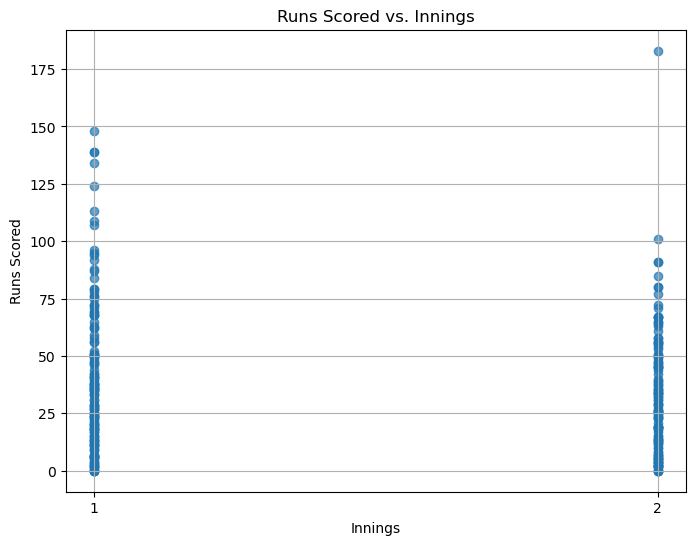

In [115]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(data['Inns'], data['Runs'], alpha=0.7)
plt.xlabel('Innings')
plt.ylabel('Runs Scored')
plt.title('Runs Scored vs. Innings')
plt.grid(True)
plt.show()

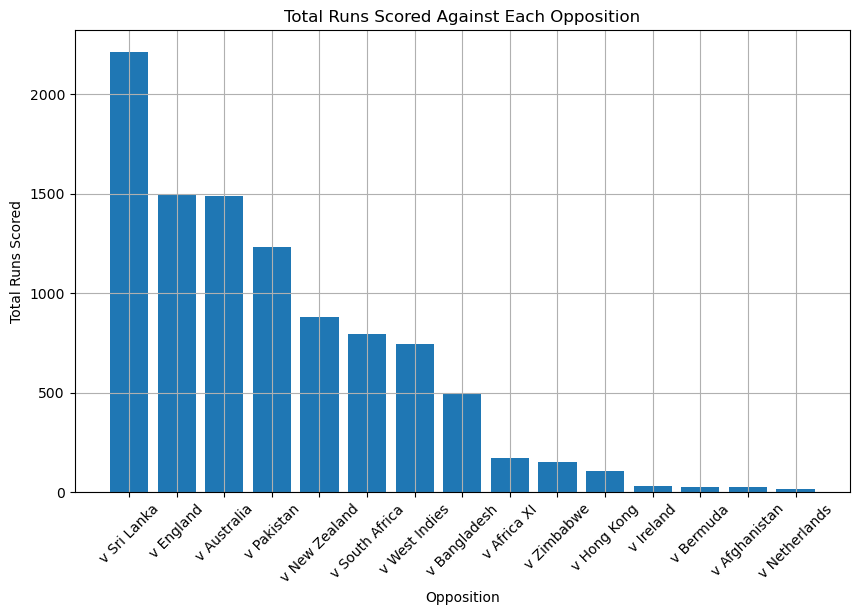

In [116]:
import matplotlib.pyplot as plt

opposition_runs = data.groupby('Opposition')['Runs'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(opposition_runs.index, opposition_runs.values)
plt.xlabel('Opposition')
plt.ylabel('Total Runs Scored')
plt.title('Total Runs Scored Against Each Opposition')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

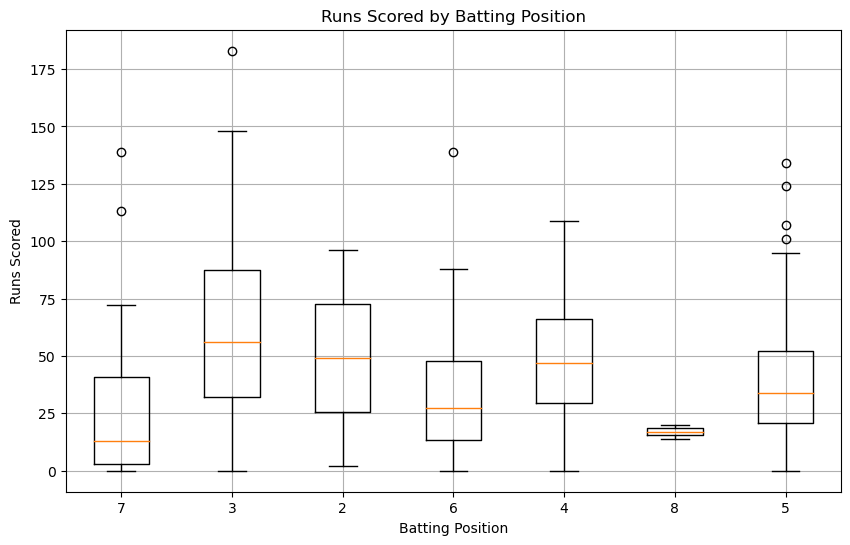

In [117]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.boxplot([data[data['Pos'] == pos]['Runs'] for pos in data['Pos'].unique()])
plt.xlabel('Batting Position')
plt.ylabel('Runs Scored')
plt.title('Runs Scored by Batting Position')
plt.xticks(range(1, len(data['Pos'].unique()) + 1), data['Pos'].unique())
plt.grid(True)
plt.show()

<Figure size 1500x1500 with 0 Axes>

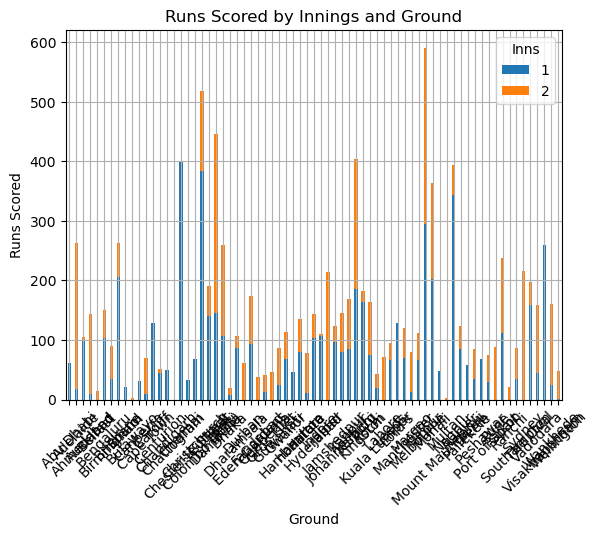

In [118]:
import matplotlib.pyplot as plt

runs_by_inns_ground = data.pivot_table(index='Ground', columns='Inns', values='Runs', aggfunc='sum')

plt.figure(figsize=(15 , 15))
runs_by_inns_ground.plot(kind='bar', stacked=True)
plt.xlabel('Ground')
plt.ylabel('Runs Scored')
plt.title('Runs Scored by Innings and Ground')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()